# FE Stats Classifier Model Analysis

In [1]:
# [FE_Stats_Data_Analysis]: Need to include path to the singleton pattern impl due to a dependency from the CharacterStatsAnalysis class
# Note: The directory is based of the current working dir of the notebook since the class base directory changes to this one
import sys, os

sys.path.append(os.path.abspath('src/Singleton'))

import torch
import torch.utils.data as torch_data
from src.Models.FEMLPClassifier import FEMLPClassifier
import src.Models.ModelAnalysis as ma
from src.Models.StatsDataset import StatsDataset

torch.manual_seed(42)

accel_device = "cuda:0"

dtype = torch.float32

batch_size = 4

num_epochs = 100

label_names = ["Marth","Linde","Palla","Alm","Roy","Lilina","Claude","Lysithea"]


In [2]:
stats_dataset = StatsDataset(accel_device, dtype)
train_dataset, test_dataset = torch_data.random_split(stats_dataset, [0.8, 0.2])
train_dataset, val_dataset = torch_data.random_split(train_dataset, [0.8, 0.2])
train_dataloader = torch_data.DataLoader(train_dataset, batch_size, True)

val_dataloader = torch_data.DataLoader(val_dataset, batch_size, True)

test_dataloader = torch_data.DataLoader(test_dataset, len(test_dataset))


### **Multilayered Perceptron (MLP) Classifier**

In [3]:
num_features = stats_dataset.stats_data[:, :-1].shape[1]
num_classes = stats_dataset.stats_data[:, -1].unique().shape[0]

baseline_sgd_config = { "optim_name":"SGD","lr":0.001,"weight_decay":1e-6 }


#### Balanced Complexity

In [4]:
balanced_mlp_classifier = FEMLPClassifier(num_features * 3, 3, num_features, num_classes, accel_device, dtype)


In [5]:
balanced_mlp_history = ma.run_train_forward_pytorch(balanced_mlp_classifier, train_dataloader, val_dataloader, num_epochs, baseline_sgd_config, accel_device, dtype)


[INFO] Epoch 1/100: Train/Validation loss = 2.2011/2.3517, train/validation accuracy = 12.50%/25.00%

[INFO] Epoch 2/100: Train/Validation loss = 2.1762/2.3302, train/validation accuracy = 18.75%/25.00%

[INFO] Epoch 3/100: Train/Validation loss = 2.1584/2.3143, train/validation accuracy = 18.75%/0.00%

[INFO] Epoch 4/100: Train/Validation loss = 2.1424/2.3026, train/validation accuracy = 18.75%/0.00%

[INFO] Epoch 5/100: Train/Validation loss = 2.1316/2.2934, train/validation accuracy = 18.75%/0.00%

[INFO] Epoch 6/100: Train/Validation loss = 2.1118/2.2885, train/validation accuracy = 25.00%/0.00%

[INFO] Epoch 7/100: Train/Validation loss = 2.1000/2.2856, train/validation accuracy = 25.00%/0.00%

[INFO] Epoch 8/100: Train/Validation loss = 2.0989/2.2853, train/validation accuracy = 25.00%/0.00%

[INFO] Epoch 9/100: Train/Validation loss = 2.0813/2.2846, train/validation accuracy = 25.00%/0.00%

[INFO] Epoch 10/100: Train/Validation loss = 2.0721/2.2854, train/validation accuracy = 2

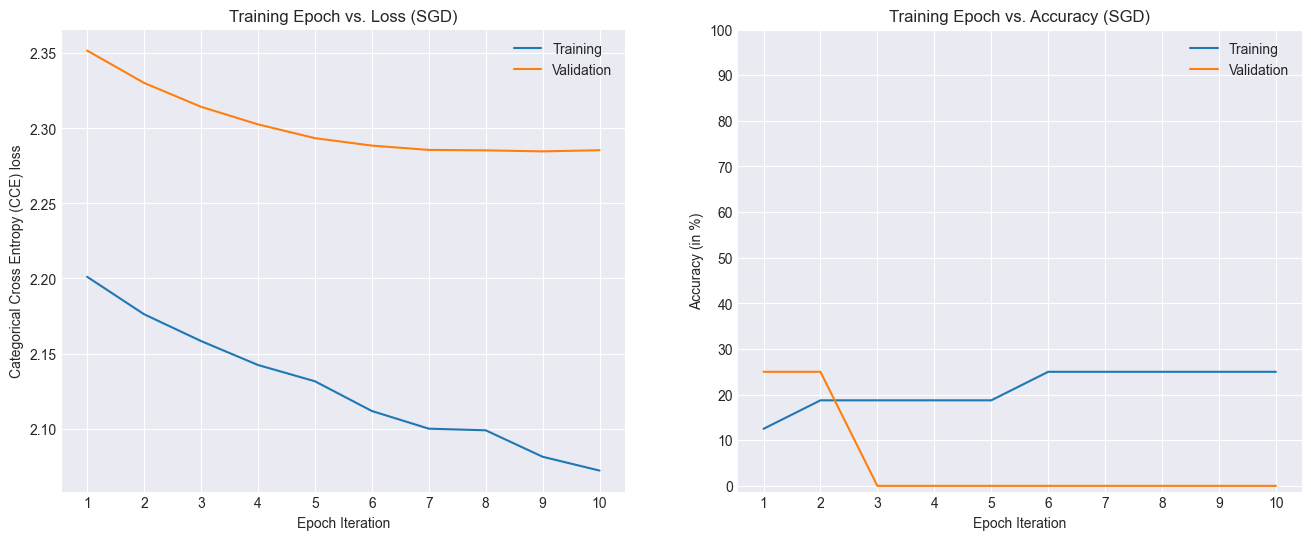

In [6]:
ma.show_analysis_charts(balanced_mlp_history["train_losses"], balanced_mlp_history["train_accs"], balanced_mlp_history["val_losses"], balanced_mlp_history["val_accs"])


In [7]:
train_labels = []

for sample in train_dataset:
    train_labels.append(sample[1].item())

val_labels = []

for sample in val_dataset:
    val_labels.append(sample[1].item())


[INFO] Training Classification Report:
              precision    recall  f1-score   support

       Marth       0.00      0.00      0.00       1.0
       Linde       0.00      0.00      0.00       2.0
       Palla       0.00      0.00      0.00       1.0
         Alm       0.00      0.00      0.00       2.0
         Roy       0.00      0.00      0.00       3.0
      Lilina       0.00      0.00      0.00       2.0
      Claude       0.00      0.00      0.00       3.0
    Lysithea       0.00      0.00      0.00       2.0

    accuracy                           0.00      16.0
   macro avg       0.00      0.00      0.00      16.0
weighted avg       0.00      0.00      0.00      16.0

[INFO] Training Confusion Matrix:


c:\Users\Trim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Trim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Trim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

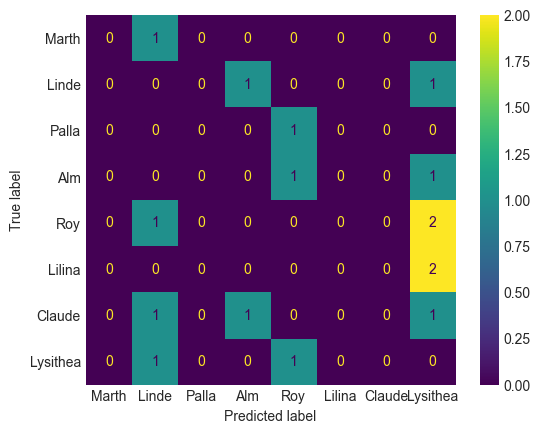

In [8]:
ma.show_metrics(ma.run_predict_forward(balanced_mlp_classifier, train_dataloader, accel_device, dtype),
                train_labels,
                label_names)
